integration by monte carlo method is  0.22349063780956643
integration by importance sampling is  0.22329363825514337


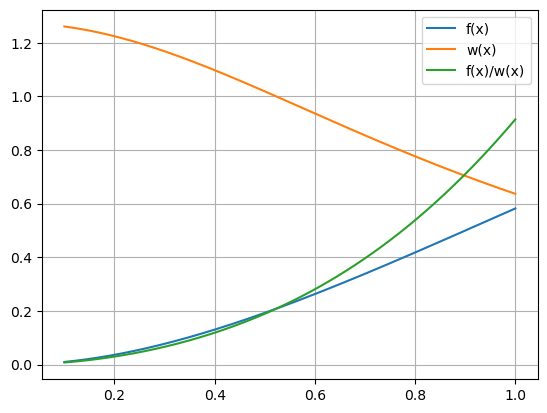

In [2]:
# Q1 
import numpy as np
import matplotlib.pyplot as plt

a1 = 0  # intergation lower limit
a2 = 1  # intergation upper limit
n = 6000  #no. of iteration

def f(x):
    return x**3/(np.exp(x)-1)

##################################################################################################
#                                 Monte carlo method integration
##################################################################################################
values1 = 0
for i in range(n):
    x = np.abs(a1-a2)*np.random.rand() + a1
    values1 += f(x)

integration = np.abs(a1-a2)*(values1/n)
print('integration by monte carlo method is ', integration)


##################################################################################################
#                                Importance sampling
##################################################################################################

def w(x):      
    return (4/np.pi)*(1/(1 + (x)**2))       #normalised w(x) in 0 to 1 ,with b=1 and x0=0

def get_x(y):
    #dy = w(x)dx => y = integration[w(x)dx] => y = (some function of x) => x = (some function of y)
    return np.tan(y*np.pi/4)   

def f_by_w(x):
    return f(x)/w(x)

# main loop
values2 = 0
for i in range(n):
    y = np.random.rand()*np.abs(a1-a2) + a1
    values2 += f_by_w(get_x(y))

    
integration2 = np.abs(a1-a2)*values2/n
print("integration by importance sampling is ",integration2)

#plotting
xs = np.linspace(0.1,1,200)
plt.plot(xs,f(xs),label='f(x)')
plt.plot(xs,w(xs),label = 'w(x)')
plt.plot(xs,f_by_w(xs), label='f(x)/w(x)')
plt.legend()
plt.grid()
plt.show()

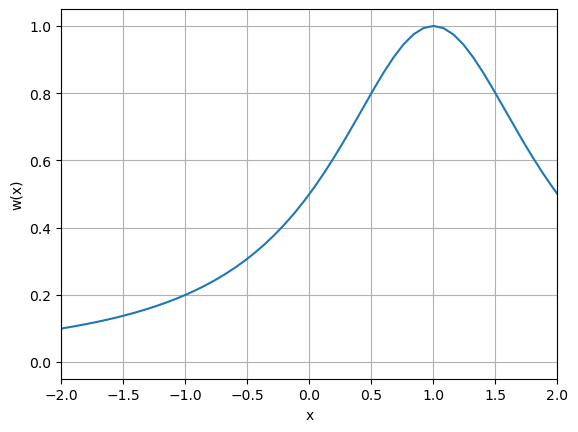

In [4]:
#Q2

xs = np.linspace(-40,40,1000)

def w(x):
    return 1/(1+(x-1)**2)

ys = w(xs)
ys = w(xs)/np.max(w(xs))  #normalisation


plt.plot(xs,ys)
plt.xlabel('x')
plt.ylabel('w(x)')
plt.xlim(-2,2)
plt.grid()

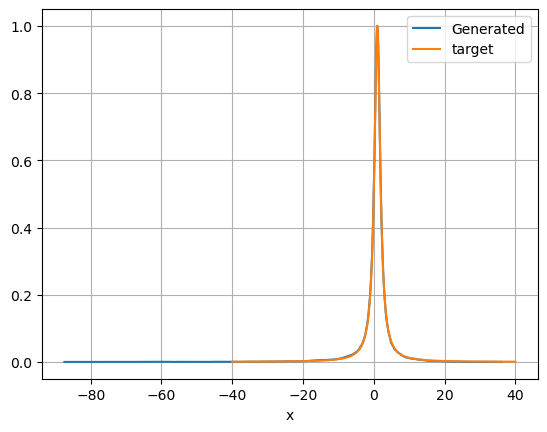

In [5]:
## doing random walk
x0 = 1  # max point
steps = 1000000
stepsize = 2 


stores = np.zeros(steps)
for i in range(steps):
    stores[i] = x0
    x1 = x0 + stepsize*(np.random.rand() - 0.5)    # -1 <=stepsize*(np.random.rand() - 0.5)<= 1
    r = w(x1)/w(x0)
    if r>1:
        x0 = x1
    else:
        a = np.random.rand()
        if a <=r:
            x0 = x1



values, edges = np.histogram(stores,500)
midpoints = [(edges[i]+edges[i+1])/2 for i in range(len(edges)-1)]
values = values/np.max(values)  # normalise

#plotting
plt.plot(midpoints, values,label='Generated')
plt.plot(xs, ys,label='target')
plt.xlabel('x')
plt.grid()
plt.legend()